# Find representative subset
We want to understand better the scoring of the results and for that we need to take small portion of the data, but we want it to be as much representative to the whole data.

Therefore, we first scan the global catalog and check in which areas have number of craters which is relative to the subsection area. 

In [154]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# %matplotlib notebook
import numpy as np
from PIL import Image
albedo = Image.open("../../data/Clementine_albedo_simp750.jpg")

In [3]:
# import catalogs and merge them: 
df1 = pd.read_csv('../../data/catalogues/HeadCraters.csv', names=['Lon','Lat','D'], header=0)
df2 = pd.read_csv('../../data/catalogues/LROCCraters.csv', usecols=[2,3,4], names=['D', 'Lon', 'Lat'], header=0)[['Lon','Lat','D']]
print(df1.info())
print(df2.info())
ca = pd.concat([df1,df2])
ca.info()

In [36]:
lon_win_size=18 #longitude window size in degrees (10% of the data)
lat_win_size=12 #latitude window size in degrees (10% of the data)
overlap=0.5 #overlap between adjacent windows, fraction
lons = np.arange(-180,180,lon_win_size-round(overlap*lon_win_size))
lats = np.arange(-90,90,lat_win_size-round(overlap*lat_win_size))
Ds = np.empty([len(lats),len(lons)])
can_lons = []
can_lats = []
for ilon,lon in enumerate(lons):
    for ilat,lat in enumerate(lats):
        ind = (ca.Lon>lon) & (ca.Lon<=lon+win_size) & (ca.Lat>lat) & (ca.Lat<=lat+win_size)
        Ds[ilat,ilon] = sum(ind)
        if (sum(ind)/len(ca)<0.011) & (sum(ind)/len(ca)>0.009): #numer of craters close to 1%
            can_lons.append(lon)
            can_lats.append(lat)

Text(0.5, 1.0, 'Crater Density')

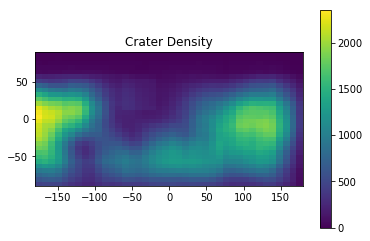

In [37]:
plt.imshow(np.flipud(Ds), extent=[-180,180,-90,90])
plt.colorbar()
plt.title('Crater Density')

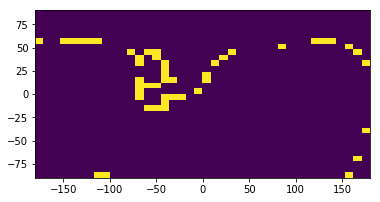

In [38]:
candidates = (Ds/len(ca)<0.011) & (Ds/len(ca)>0.009)
plt.imshow(np.flipud(candidates), extent=[-180,180,-90,90])

In [110]:
(N, Bins)=np.histogram(ca.D,bins=100, density=True, range=(5,50))
dists=[]
for i in range(len(can_lats)):
# i=1;
    lon = can_lons[i]; lat = can_lats[i]
    ind = (ca.Lon>lon) & (ca.Lon<=lon+win_size) & (ca.Lat>lat) & (ca.Lat<=lat+win_size)
    (n, bins) = np.histogram(ca.loc[ind,'D'], bins=100, density=True, range=(5,50))
    dists.append(((N-n)**2).sum())
sort_ind = np.argsort(dists)

best match found at lats -18 - -6, longs -63 - -45, with 257 craters.


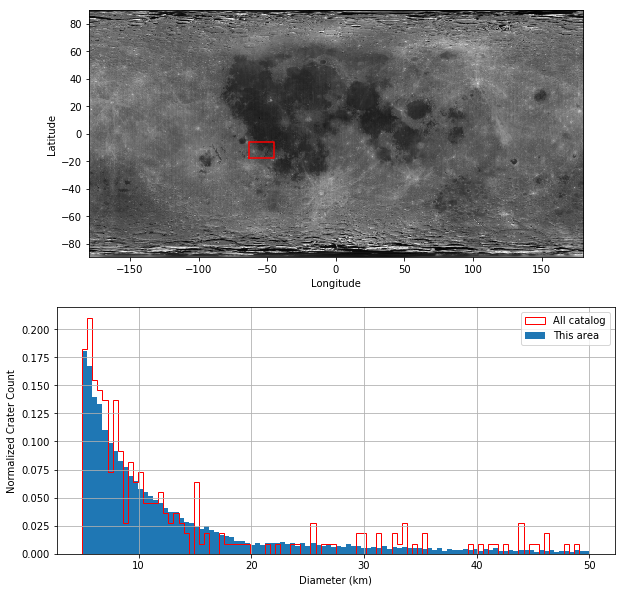

In [184]:
i=sort_ind[1]
lon = can_lons[i]; lat = can_lats[i]
ind = (ca.Lon>lon) & (ca.Lon<=lon+win_size) & (ca.Lat>lat) & (ca.Lat<=lat+win_size)
print('best match found at lats {} - {}, longs {} - {}, with {} craters.'.format(lat,lat+lat_win_size,lon,lon+lon_win_size,sum(ind)))

plt.figure(figsize=[10, 10])
plt.subplot(2,1,1)
dem_map = plt.imshow(albedo, extent=[-180,180,-90,90], aspect="equal", cmap="gray")
plt.xlabel("Longitude"); plt.ylabel("Latitude")
plt.plot([lon, lon, lon+lon_win_size, lon+lon_win_size, lon], [lat, lat+lat_win_size, lat+lat_win_size, lat, lat],'r');
plt.subplot(2,1,2)
ca.D.hist(bins=100, density=True, range=(5,50))
ca.loc[ind,'D'].hist(bins=100, density=True, histtype='step', range=(5,50), color='red');
plt.legend(['All catalog','This area'])
plt.xlabel('Diameter (km)')
plt.ylabel('Normalized Crater Count');

# Scraping LROC DEM Locations

In [208]:
import urllib

link = "http://lroc.sese.asu.edu/data/LRO-L-LROC-5-RDR-V1.0/LROLRC_2001/DATA/SDP/NAC_DTM/"
f = urllib.request.urlopen(link)
# webtext = str(f.read())
# type(webtext)
# lines = webtext[webtext.find('Parent Directory'):]
lines = f.readlines()
for line in lines:
    print(line)
# myfile = f.readline()
# print(lines[1])

b'<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 3.2 Final//EN">\n'
b'<html>\n'
b' <head>\n'
b'  <title>Index of /data/LRO-L-LROC-5-RDR-V1.0/LROLRC_2001/DATA/SDP/NAC_DTM</title>\n'
b' </head>\n'
b' <body>\n'
b'<h1>Index of /data/LRO-L-LROC-5-RDR-V1.0/LROLRC_2001/DATA/SDP/NAC_DTM</h1>\n'
b'  <table>\n'
b'   <tr><th valign="top"><img src="/icons/blank.gif" alt="[ICO]"></th><th><a href="?C=N;O=D">Name</a></th><th><a href="?C=M;O=A">Last modified</a></th><th><a href="?C=S;O=A">Size</a></th><th><a href="?C=D;O=A">Description</a></th></tr>\n'
b'   <tr><th colspan="5"><hr></th></tr>\n'
b'<tr><td valign="top"><img src="/icons/back.gif" alt="[PARENTDIR]"></td><td><a href="/data/LRO-L-LROC-5-RDR-V1.0/LROLRC_2001/DATA/SDP/">Parent Directory</a></td><td>&nbsp;</td><td align="right">  - </td><td>&nbsp;</td></tr>\n'
b'<tr><td valign="top"><img src="/icons/folder.gif" alt="[DIR]"></td><td><a href="A12LMAS/">A12LMAS/</a></td><td align="right">2018-12-14 13:59  </td><td align="right">  - </td><td>&nbsp;</td><

In [219]:
import os
import time
# Download file:
data_path = '../../data/'
fn_pre='HANSTEENAL3'

# fn_pre='NAC_DTM_POSIDONIUS'
website = 'http://lroc.sese.asu.edu/data/LRO-L-LROC-5-RDR-V1.0/LROLRC_2001/DATA/SDP/NAC_DTM/'
# website='http://lroc.sese.asu.edu/data/LRO-L-LROC-5-RDR-V1.0/LROLRC_2001/DATA/SDP/NAC_DTM/AESTUUM2/'
# for fn in [fn_pre+'.TIF', fn_pre+'.LBL']:
fn = 'NAC_DTM_'+fn_pre+'.LBL'
if os.path.isfile(data_path+fn): 
    print('File {} exist in library!'.format(fn))
else: 
    s_time = time.time()
    print('File {} does not exist in library. downloading now ...'.format(fn))
    URL = website+fn_pre+'/'+fn
#         os.sys('wget -P "$data_path" "$URL"')
    !wget -P "$data_path" "$URL"
    print('Downloaded into {}'.format(data_path+fn))
    print("Time elapsed: {0:.1f} sec".format(time.time() - s_time))
        
# Read source image.
# img = Image.open(data_path + fn_pre + '.TIF')
# print('Original image. size (shape): {} | mode (bit depth): {}'.format(img.size, img.mode))
# dimensions of source image: [Min long, max long, min lat, max lat] 
# read from Label file: 
import re
file = open(data_path + fn,'r')
lines = [line.rstrip('\n') for line in file]
for line in lines:
    if 'MAXIMUM_LATITUDE' in line:
        max_lat=float(re.findall("\d+.\d*",line)[0])
    if 'MINIMUM_LATITUDE' in line:
        min_lat=float(re.findall("\d+.\d*",line)[0])
    if 'EASTERNMOST_LONGITUDE' in line:
        max_lon=float(re.findall("\d+.\d*",line)[0])
    if 'WESTERNMOST_LONGITUDE' in line:
        min_lon=float(re.findall("\d+.\d*",line)[0])
    if 'MAP_SCALE' in line:
        res=float(re.findall("\d+.\d*",line)[0])

source_cdim = [min_lon, max_lon, min_lat, max_lat]
print(source_cdim)
print('map resolution: {} m/pix'.format(res))

File NAC_DTM_HANSTEENAL3.LBL does not exist in library. downloading now ...
--2019-09-23 12:36:12--  http://lroc.sese.asu.edu/data/LRO-L-LROC-5-RDR-V1.0/LROLRC_2001/DATA/SDP/NAC_DTM/HANSTEENAL3/NAC_DTM_HANSTEENAL3.LBL
Resolving lroc.sese.asu.edu (lroc.sese.asu.edu)... 129.219.107.13
Connecting to lroc.sese.asu.edu (lroc.sese.asu.edu)|129.219.107.13|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7975 (7.8K)
Saving to: ‘../../data/NAC_DTM_HANSTEENAL3.LBL’

NAC_DTM_HANSTEENAL3 100%[===================>]   7.79K  --.-KB/s    in 0.04s   

2019-09-23 12:36:12 (190 KB/s) - ‘../../data/NAC_DTM_HANSTEENAL3.LBL’ saved [7975/7975]

Downloaded into ../../data/NAC_DTM_HANSTEENAL3.LBL
Time elapsed: 0.3 sec
[309.72364601, 310.08409431, 12.95808328, 11.24801499]
map resolution: 4.9999999999999 m/pix
